In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.constants as sc

In [70]:
mec2 = sc.m_e * sc.c**2 / sc.e
λ = 1e-4
ω = 2*sc.pi*sc.c/λ
k = ω/sc.c
print(f'k = {0.01*k:.2f}/cm')
λU = 0.1
kU = 2*sc.pi/λU
E_kin = 30.0e6
γ = E_kin / mec2 + 1
print(f'γ = {γ:.3f}')
K = np.sqrt(2.0*(λ/λU * 2*γ**2 -1.0))
print(f'K = {K:.3f}')

k = 628.32/cm
γ = 59.709
K = 3.501


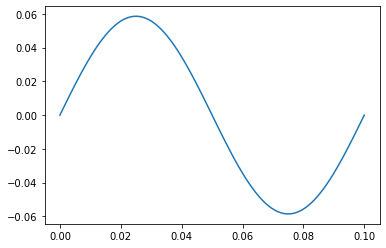

In [71]:
βx = lambda z: K/γ * np.sin(kU*z)

z_range = np.linspace(0,λU,100)
plt.plot(z_range,βx(z_range))
plt.show()

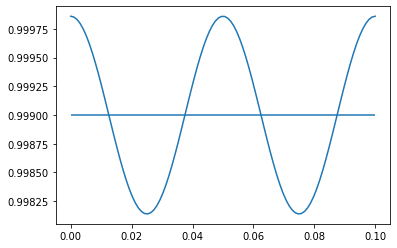

In [72]:
βz = lambda z: np.sqrt(1.0 - 1.0/γ**2 - βx(z)**2)
βz_star = 1.0 - λ/λU

plt.plot(z_range,βz(z_range))
plt.hlines(βz_star,0,λU)
plt.show()

In [73]:
f = lambda z: 1.0/βz(z)
ct = lambda z: scipy.integrate.quad(f, 0, z)[0]

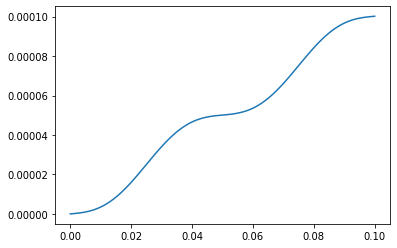

In [74]:
ct_range = np.array([ct(z) for z in z_range])
plt.plot(z_range,ct_range-z_range)
plt.show()

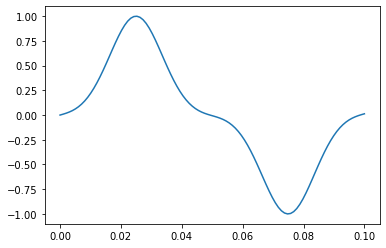

In [75]:
Ex = lambda z: np.sin(k*ct(z) - k*z)

Ex_range = np.array([Ex(z) for z in z_range])
plt.plot(z_range,Ex_range)
plt.show()

In [76]:
f2 = lambda z: np.sin(kU*z)*Ex(z)
FF = scipy.integrate.quad(f2, 0, λU)[0] / λU
FF

0.3710602007241054

In [77]:
E0 = 1e6
Δγ = sc.e/(sc.m_e*sc.c**2)*E0*K/γ*λU*FF
print(f'Δγ = {Δγ:.6f}')

Δγ = 0.004258


In [1]:
import os, sys
TEUFEL_ROOT = '/home/ulf/Programming/teufel'
os.chdir(TEUFEL_ROOT)
print(os.getcwd())
# sys.path.append(TEUFEL_ROOT+'/scripts')
from scripts.teufel import *
# import scripts.teufel

/home/ulf/Programming/teufel
TEUFEL - THz Emission from Undulators and Free-Electron Lasers


In [2]:
initial = TeufelWatch.read('fel-modulation_initial.h5')
print(np.mean(initial.z))
final = TeufelWatch.read('fel-modulation_final.h5')
print(np.mean(final.z))

reading  fel-modulation_initial.h5
have read 500 particles.
-3.8527937821081346e-07
reading  fel-modulation_final.h5
have read 500 particles.
1.9998750696690404


-0.04306421303041219 0.04304132285043494


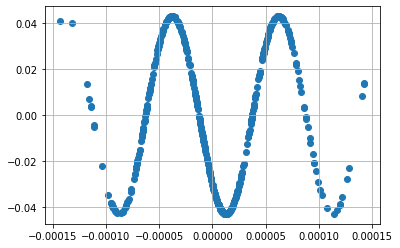

In [25]:
z = initial.z
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

plt.scatter(z,dg)
plt.grid()
plt.show()